# Import Packages

In [1]:
# manipulation
import numpy as np
import pandas as pd 

In [2]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [5]:
# For saving models
import pickle

import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [6]:
# Set the mode to 'warn' to suppress the warning
pd.set_option('mode.chained_assignment', None)

# Now you can proceed with your code without encountering the warning

# Import File

In [7]:
hr_data = pd.read_csv("HR_Sailfort_dataset.csv")

Read the data 

In [8]:
# Starting 10 columns
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
# Ending 10 columns
hr_data.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


# EDA

In [10]:
# 1. Data information
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
hr_data.shape

(14999, 10)

In [12]:
print("Number of rows: ", hr_data.shape[0])
print("Number of columns: ", hr_data.shape[1])

Number of rows:  14999
Number of columns:  10


In [13]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
hr_data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [15]:
# 2. Display all columns names
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
# Rename columns as needed
hr_data = hr_data.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# Check Null values in the dataset

In [17]:
hr_data.isnull()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [18]:
hr_data.isnull(). sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the dataset

In [19]:
# Check for any duplicate entries in the data.
hr_data.duplicated().sum()

3008

It means 3,008 rows contain duplicates.

In [20]:
# Inspect some rows containing duplicates as needed
hr_data[hr_data.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [21]:
# Starting 10
hr_data[hr_data.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


# Drop Duplicates

In [22]:
hr_data1 = hr_data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
hr_data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
print('No. of duplicates: ',hr_data1.duplicated().sum())

No. of duplicates:  0


In [24]:
hr_data1.shape

(11991, 10)

# Outlier in tenure

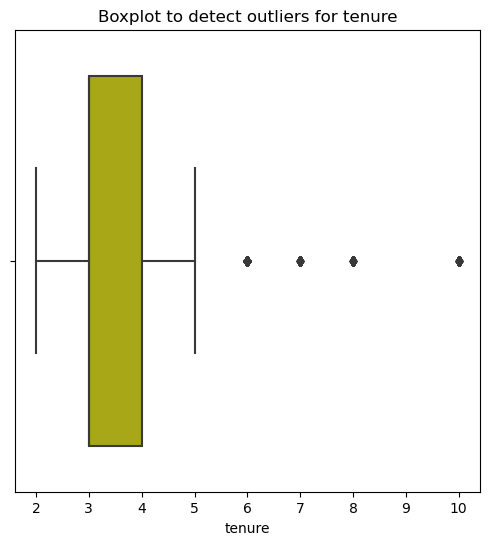

In [25]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
sns.boxplot(x=hr_data1['tenure'], color='y')
plt.title('Boxplot to detect outliers for tenure')
plt.show()

In [26]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = hr_data1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = hr_data1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

Lower limit: 1.5
Upper limit: 5.5


In [27]:
# Identify subset of data containing outliers in `tenure`
outliers = hr_data1[(hr_data1['tenure'] > upper_limit) | (hr_data1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Number of rows in the data containing outliers in `tenure`: 824


In [28]:
Q1 = hr_data1['tenure'].quantile(0.25)
Q3 = hr_data1['tenure'].quantile(0.75)

IQR = Q3 - Q1

upperL = Q3 + 1.5 * IQR

print('The threshold for outliers lies at {}.'.format(upperL))

print('')
print('Number of outliers: \n')

print(hr_data1[hr_data1['tenure'] > upperL].count())

The threshold for outliers lies at 5.5.

Number of outliers: 

satisfaction_level       824
last_evaluation          824
number_project           824
average_monthly_hours    824
tenure                   824
work_accident            824
left                     824
promotion_last_5years    824
department               824
salary                   824
dtype: int64


There are 824 Outliers

In [29]:
# Get numbers of people who left vs. stayed
print("Number of people who left company: ",hr_data1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print("Percentage of people who left company: ",hr_data1['left'].value_counts(normalize=True)*100)

Number of people who left company:  left
0    10000
1     1991
Name: count, dtype: int64

Percentage of people who left company:  left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


C:\Users\kartik\AppData\Local\Temp\ipykernel_12204\3756071380.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticks(),size=14)
C:\Users\kartik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


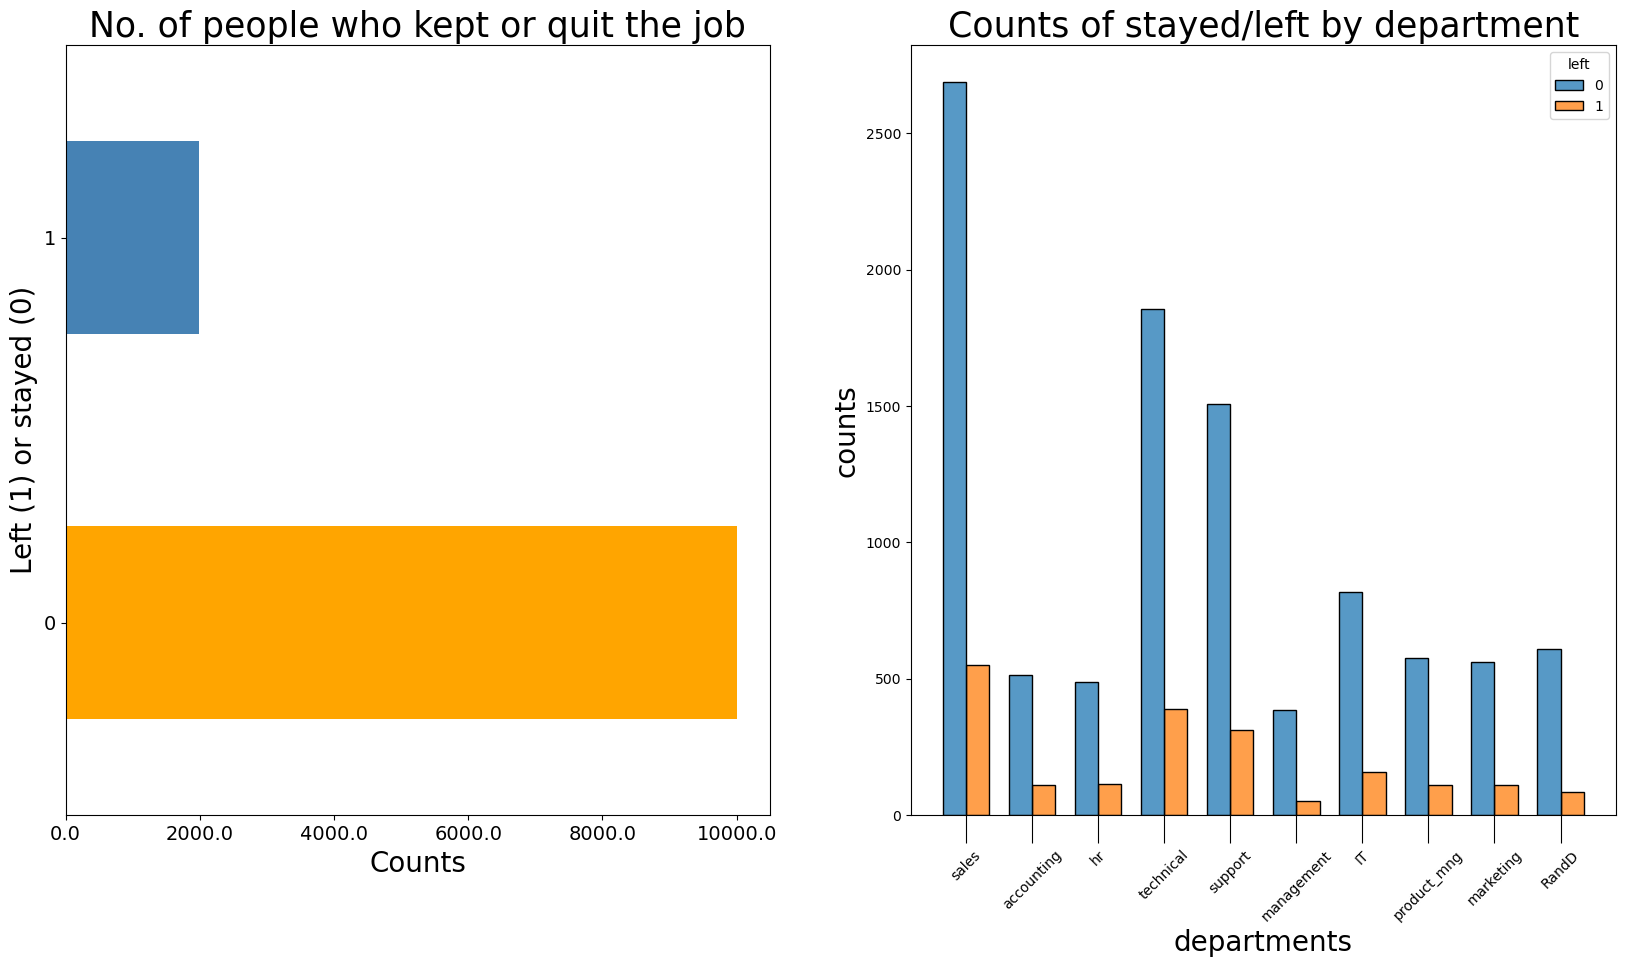

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1 = hr_data1['left'].value_counts().plot(kind='barh',color=['orange','steelblue'],ax=ax1)
ax1.set_xlabel('Counts',fontsize=20)
ax1.set_ylabel('Left (1) or stayed (0)',fontsize=20)
ax1.set_title('No. of people who kept or quit the job',fontsize=25)
#ax1.set_facecolor("whitesmoke")
ax1.set_xticklabels(ax1.get_xticks(),size=14)
ax1.set_yticklabels(ax1.get_yticks(),size=14)

ax2 = sns.histplot(data=hr_data1,x='department',hue='left',discrete=1,hue_order=[0,1],multiple='dodge',shrink=.7)
ax2.tick_params(axis='x',labelrotation=45,size=20)
ax2.set_xlabel('departments',fontsize=20)
ax2.set_ylabel('counts',fontsize=20)
ax2.set_title('Counts of stayed/left by department',fontsize=25);

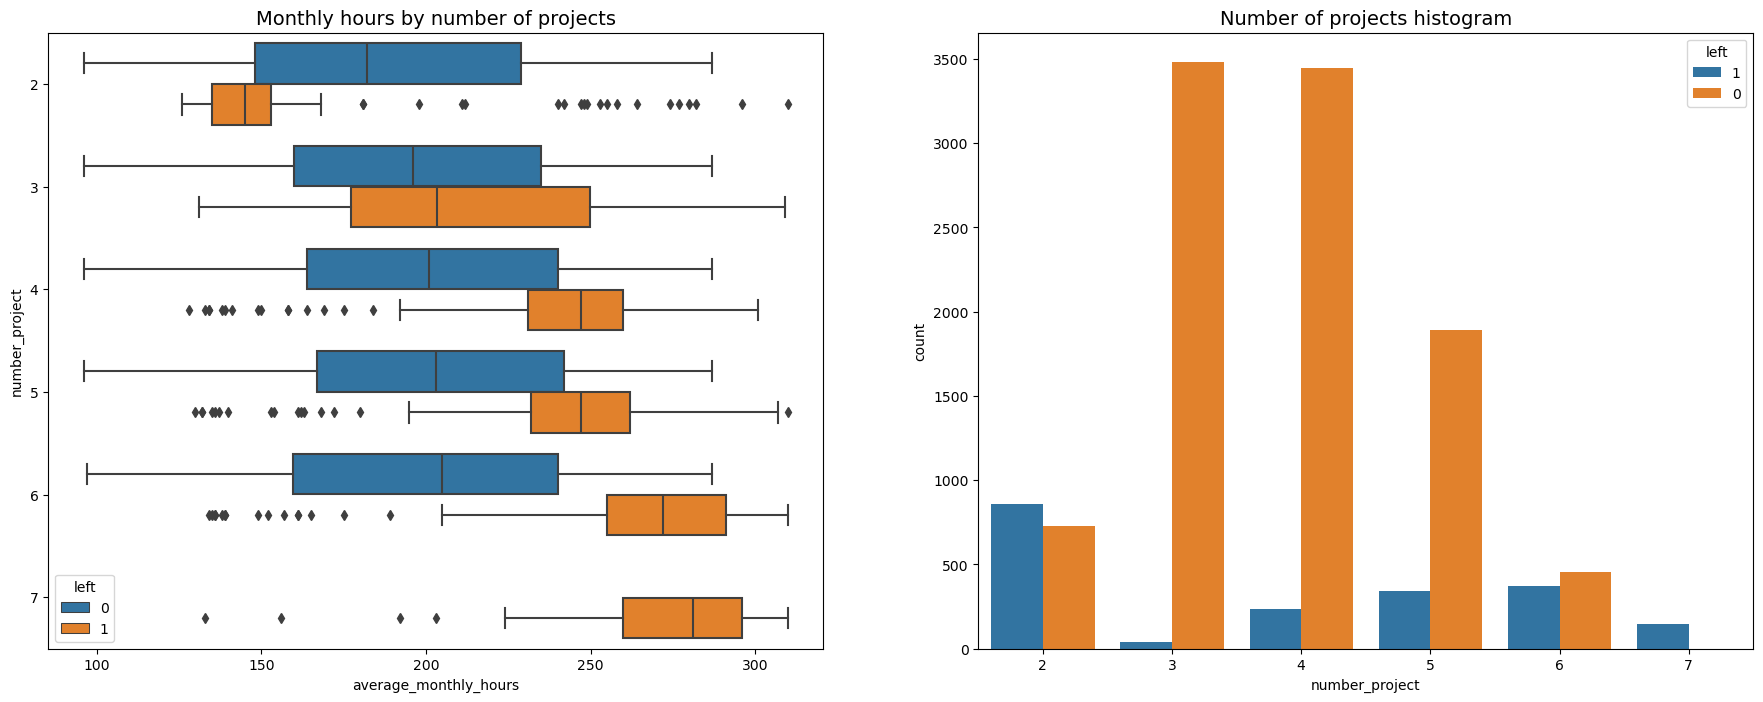

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=hr_data1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Convert 'left' column to string to avoid attribute error
hr_data1['left'] = hr_data1['left'].astype(str)

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.countplot(data=hr_data1, x='number_project', hue='left', ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

C:\Users\kartik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

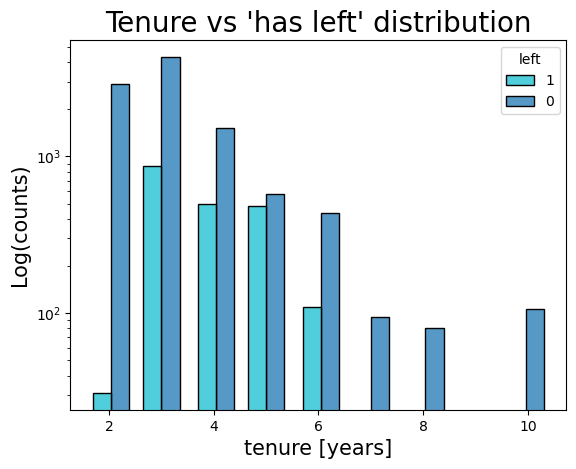

In [32]:
fig = sns.histplot(data=hr_data1,x='tenure',hue='left',multiple="dodge",shrink=8,palette=["C9","C10"])
plt.xlabel("tenure [years]",fontsize=15)
plt.ylabel("Log(counts)",fontsize=15)
plt.title("Tenure vs 'has left' distribution",fontsize=20)
plt.yscale('log')

plt.plot()

C:\Users\kartik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kartik\AppData\Local\Temp\ipykernel_12204\2878912281.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticks(),size=14)
C:\Users\kartik\AppData\Local\Temp\ipykernel_12204\2878912281.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(),size=14)


[Text(0, 0.0, '0.0'),
 Text(0, 500.0, '500.0'),
 Text(0, 1000.0, '1000.0'),
 Text(0, 1500.0, '1500.0'),
 Text(0, 2000.0, '2000.0'),
 Text(0, 2500.0, '2500.0'),
 Text(0, 3000.0, '3000.0'),
 Text(0, 3500.0, '3500.0'),
 Text(0, 4000.0, '4000.0')]

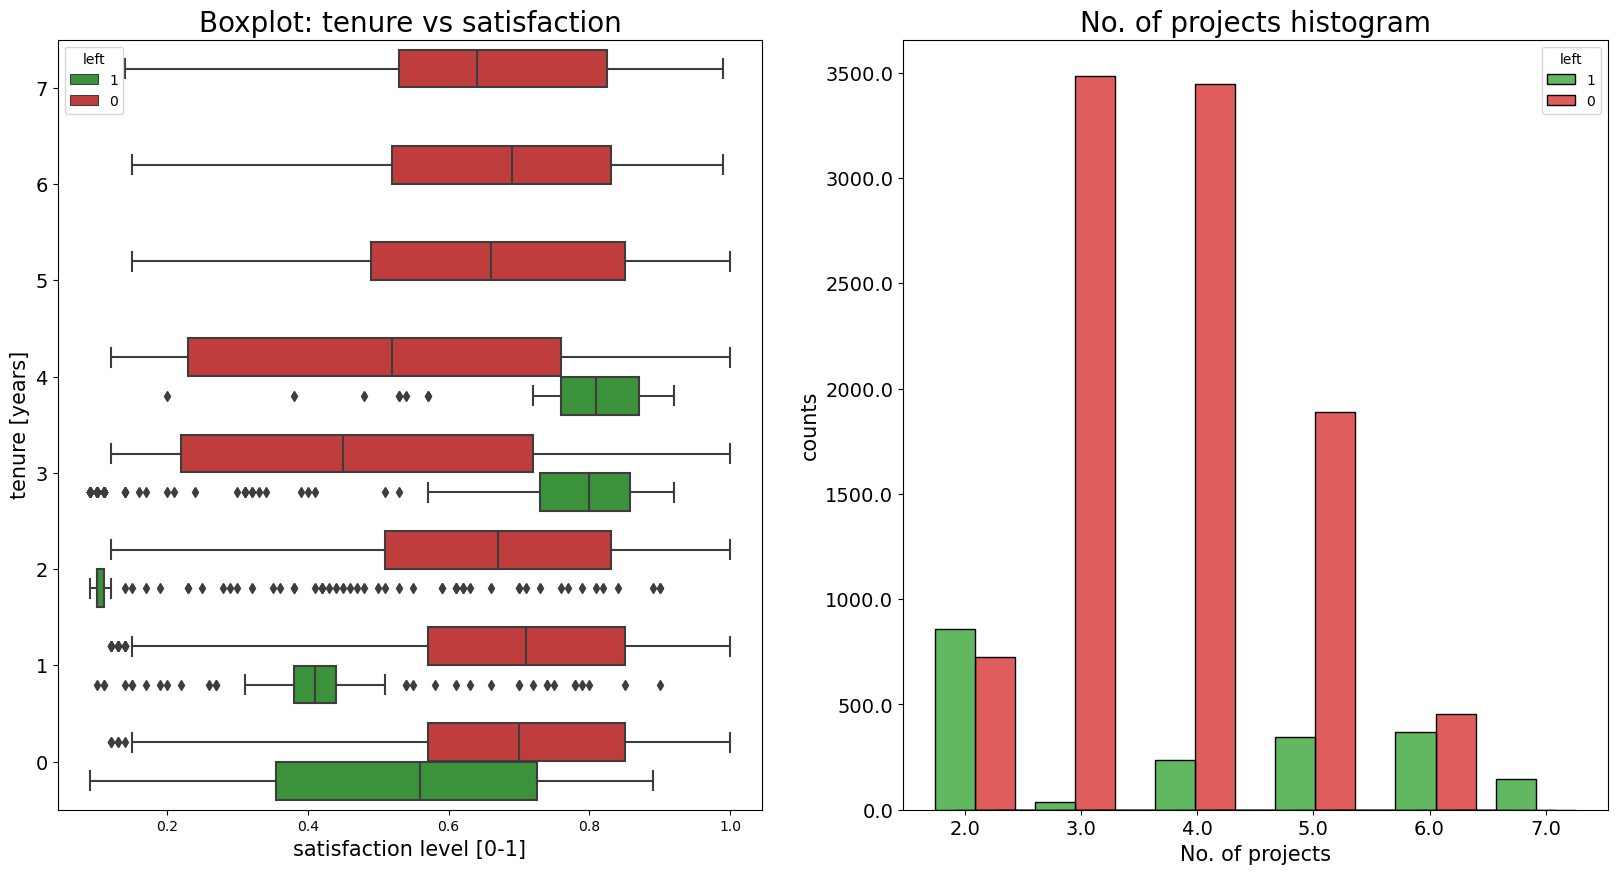

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1 = sns.boxplot(data=hr_data1,x='satisfaction_level',y='tenure',hue='left',orient="h",ax=ax1,palette=["C2","C3"])
ax1.invert_yaxis()
ax1.set_xlabel("satisfaction level [0-1]", fontsize=15)
ax1.set_ylabel("tenure [years]",fontsize=15)
ax1.set_title('Boxplot: tenure vs satisfaction',fontsize=20)
#ax1.set_xticklabels(ax1.get_xticks(),size=14)
ax1.set_yticklabels(ax1.get_yticks(),size=14)

tenure_stay = hr_data1[hr_data1['left']==0]['number_project']
tenure_left = hr_data1[hr_data1['left']==1]['number_project']
sns.histplot(data=hr_data1,x='number_project',hue='left',multiple='dodge',shrink=4,ax=ax2,palette=["C2","C3"])
ax2.set_title('No. of projects histogram',fontsize='20')
ax2.set_xlabel("No. of projects",fontsize=15)
ax2.set_ylabel("counts",fontsize=15)
ax2.set_xticklabels(ax2.get_xticks(),size=14)
ax2.set_yticklabels(ax2.get_yticks(),size=14)

In [34]:
# Get value counts of stayed/left for employees with 7 projects
hr_data1[hr_data1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave the company.

Now, next examine the average monthly hours versus the satisfaction levels

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

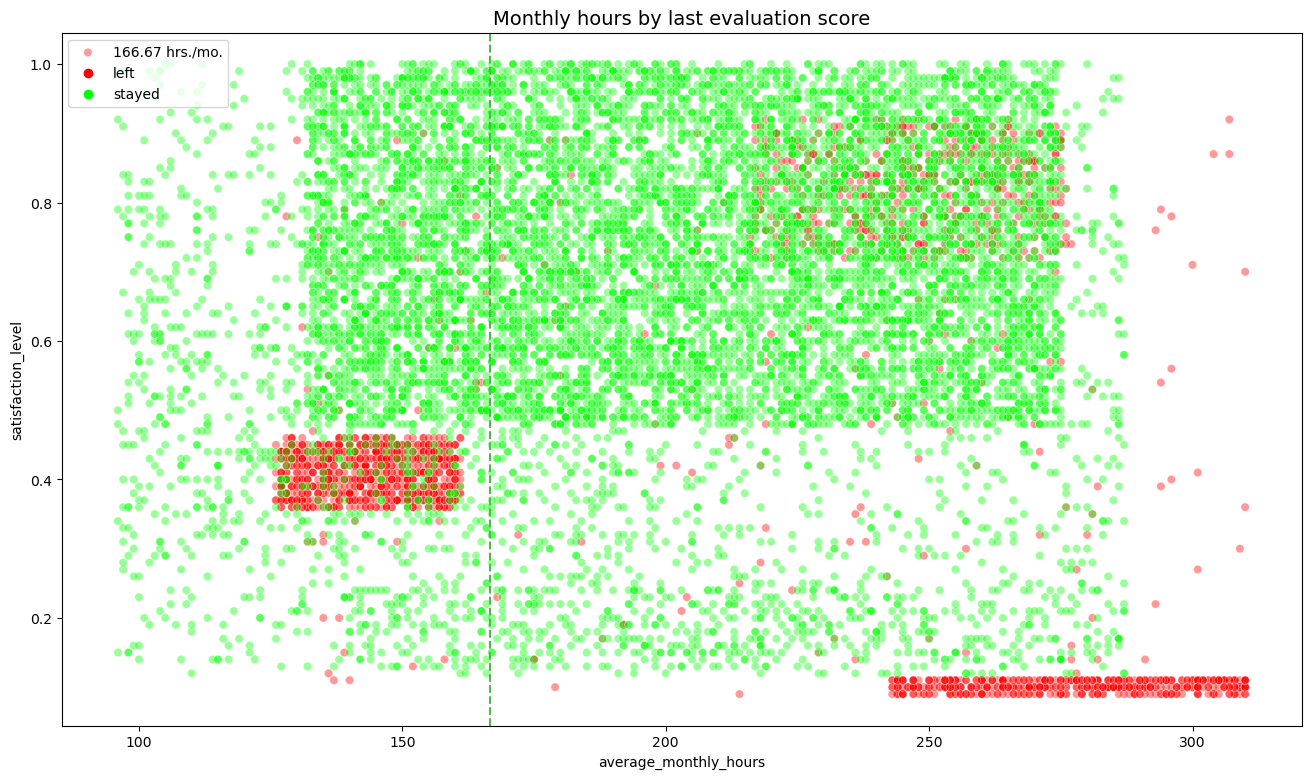

In [35]:
# Define custom colors for 'left' and 'stayed' categories
custom_palette = ['#ff0000', '#00ff00']  # Red for 'left', Green for 'stayed'

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=hr_data1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4, palette=custom_palette)
plt.axvline(x=166.67, color='#51b749', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'], loc='upper left')  # Adjust legend location if needed
plt.title('Monthly hours by last evaluation score', fontsize='14')


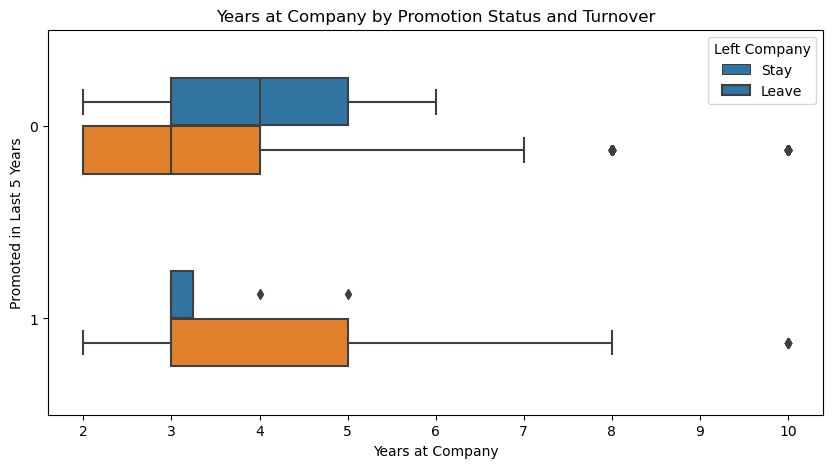

In [36]:
# Create boxplot
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(x="tenure", y="promotion_last_5years", hue="left", data=hr_data1, width=0.5, orient="h")
plt.title("Years at Company by Promotion Status and Turnover")
plt.xlabel("Years at Company")
plt.ylabel("Promoted in Last 5 Years")
boxplot.legend(labels=["Stay", "Leave"], title='Left Company')
plt.show();

Salary Level and Worload

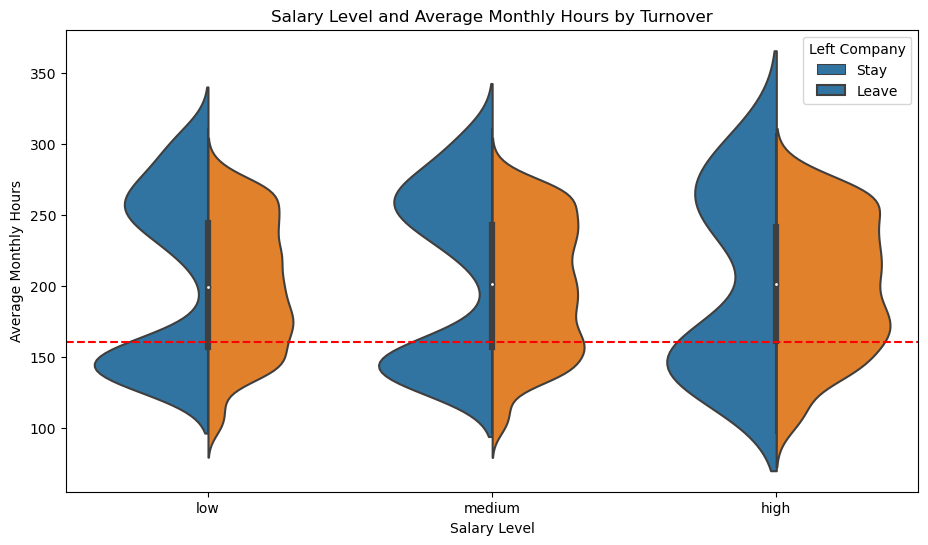

In [37]:
# Create violin plot
plt.figure(figsize=(11, 6))
sns.violinplot(x="salary", y="average_monthly_hours", hue="left", data=hr_data1, split=True)
plt.axhline(y=160, color="r", linestyle="--", label="Average 160hrs/month")
plt.title("Salary Level and Average Monthly Hours by Turnover")
plt.xlabel("Salary Level")
plt.ylabel("Average Monthly Hours")
plt.legend(labels=["Stay", "Leave"], title="Left Company")
plt.show()

Now, plot the satisfaction vs salary (left) and salary vs 'has left' (right) distributions.

C:\Users\kartik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kartik\AppData\Local\Temp\ipykernel_12204\47618860.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(),size=14)
C:\Users\kartik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Salary vs 'has left' distribution")

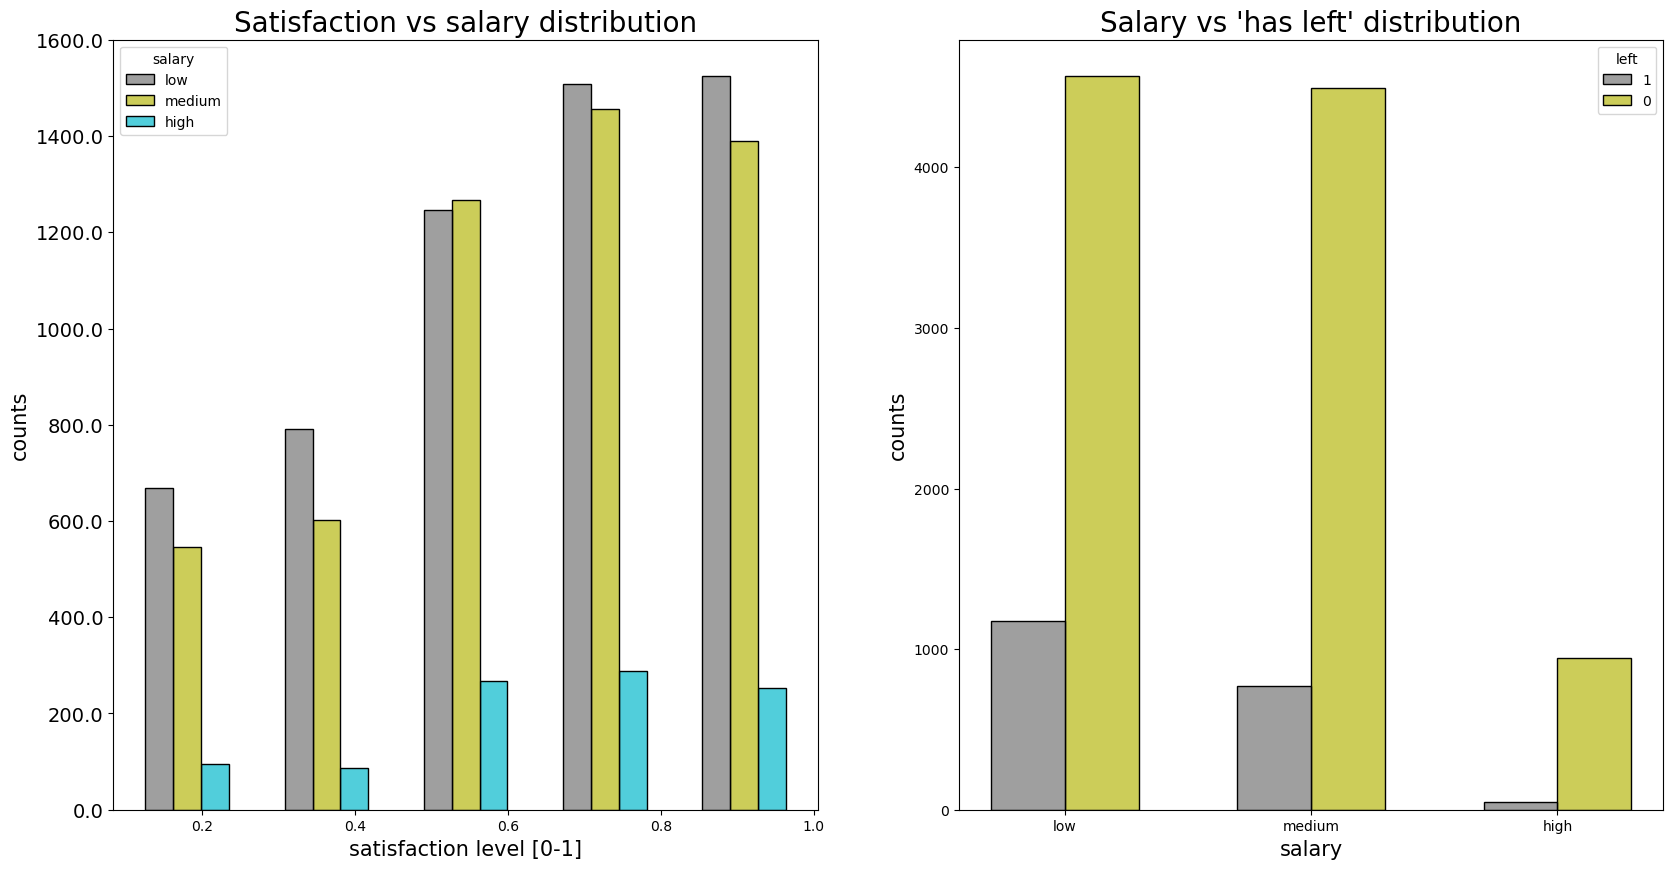

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1 = sns.histplot(data=hr_data1,x='satisfaction_level',hue='salary',ax=ax1,multiple="dodge",shrink=0.6,
                   palette=["C7","C8","C9"],bins=5)
ax1.set_xlabel("satisfaction level [0-1]",fontsize=15)
ax1.set_ylabel("counts",fontsize=15)
ax1.set_title('Satisfaction vs salary distribution',fontsize=20)
ax1.set_yticklabels(ax1.get_yticks(),size=14)

ax2 = sns.histplot(data=hr_data1,x='salary',discrete=1,hue='left',ax=ax2,multiple="dodge",shrink=0.6,
                   palette=["C7","C8"])
ax2.set_xlabel("salary",fontsize=15)
ax2.set_ylabel("counts",fontsize=15)
ax2.set_title("Salary vs 'has left' distribution",fontsize=20)

# Correlation Matrix

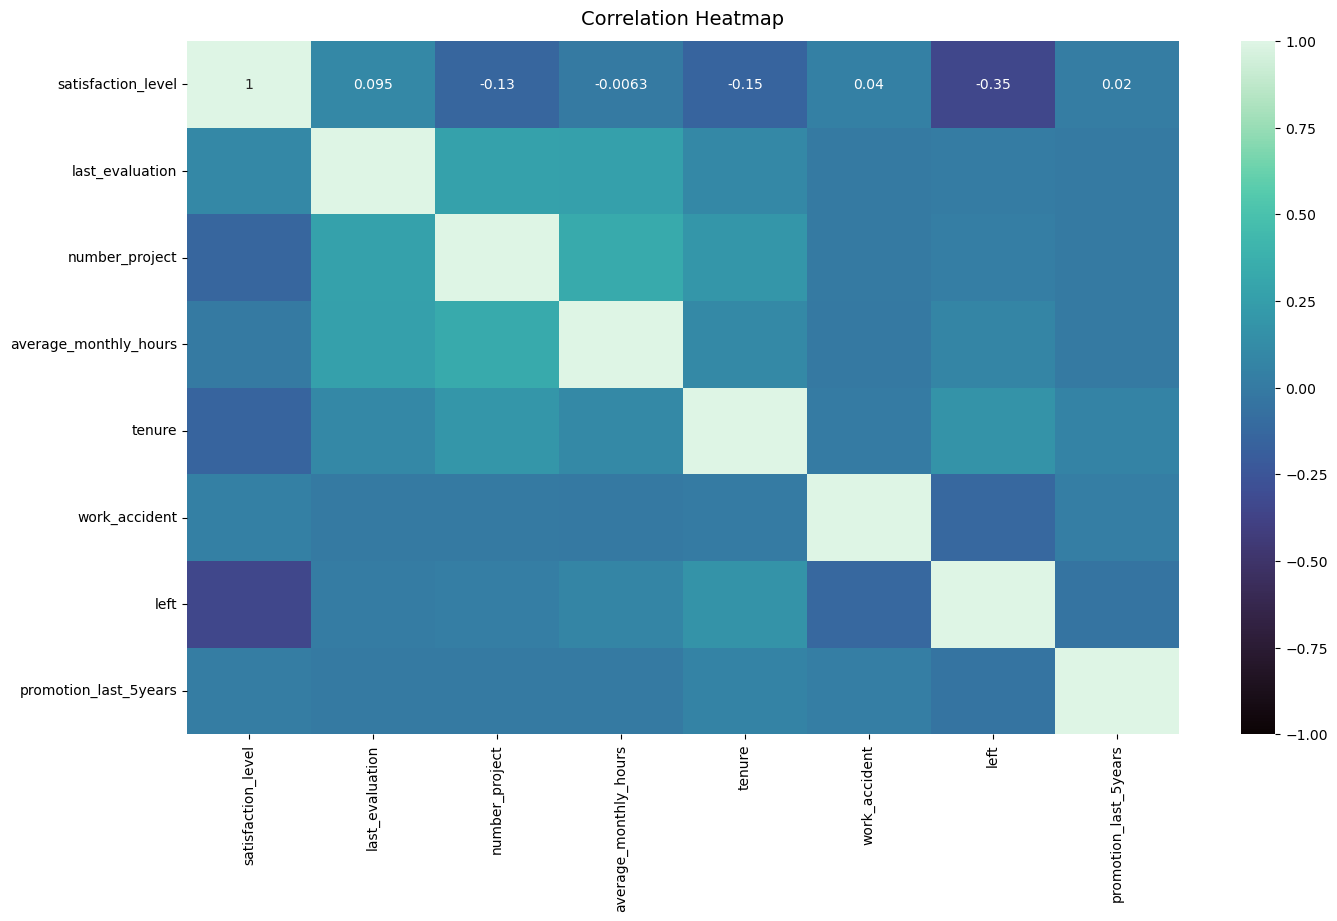

In [39]:
df1 = hr_data1.drop(columns=['department','salary'],axis=1)

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("mako",as_cmap=True))
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':14},pad=12);

## Model Building

## Logistic Regression

In [40]:
hr_data2 = hr_data1.copy()
LABELS = hr_data2.columns

le = LabelEncoder()

for col in LABELS:
    # Check if object
    if hr_data2[col].dtype == 'O':
        # Fit label encoder and return encoded labels
        hr_data2[col] = le.fit_transform(hr_data2[col]) 
    elif hr_data2[col].dtype == 'bool':
        hr_data2[col] = hr_data2[col].astype('int')

hr_data2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [41]:
hr_data2_no_outL = hr_data2[hr_data2['tenure'] < upperL]
hr_data2_no_outL.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1


In [42]:
# Compare the length of the datasets with and without the outliers.
print('Dataset with outliers, dimension: ',hr_data2.shape)
print('Dataset without outliers, dimension: ',hr_data2_no_outL.shape)

Dataset with outliers, dimension:  (11991, 10)
Dataset without outliers, dimension:  (11167, 10)


Now, define X and Y variable

In [43]:
x = hr_data2_no_outL.drop('left',axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
5,0.41,0.50,2,153,3,0,0,7,1


In [44]:
y = hr_data2_no_outL['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int32

# Split into train and test sets

In [45]:
# Split into train and test sets
x_tr, x_test, y_tr, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# Split into train and validate sets
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

# Increase the number of iterations
clf = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
clf = LogisticRegression().fit(x_train_scaled, y_train)

# Try different solver
clf = LogisticRegression(solver='liblinear').fit(x_train, y_train)


In [47]:
print('coeff = ',clf.coef_)
print()
print('intercept = ',clf.intercept_)

coeff =  [[-4.36908542e+00 -1.08552739e-01 -4.98670752e-01  4.00573118e-03
   1.09845820e+00 -1.55891960e+00 -1.27029155e+00  3.09570952e-02
  -4.50022428e-03]]

intercept =  [-1.72982818]


## Decision Tree

In [48]:
# Create a decision tree classifier
clf_tree = DecisionTreeClassifier(random_state = 42)

# Define hyperparameters to tune
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 6],
             'min_samples_split': [2, 4, 5]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Perform cross-validated grid search
clf_tree1 = GridSearchCV(clf_tree, cv_params, scoring=scoring, cv=5, refit='f1')

In [49]:
# fit the decision tree model to the training data
clf_tree1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [2, 4, 5]},
             refit='f1',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [50]:
# Check best f1 score on CV
print("Best f1 score found: ", clf_tree1.best_score_)

Best f1 score found:  0.9434273563518378


In [51]:
# Predict on train set
y_pred_val_tree1 = clf_tree1.predict(x_val)

In [52]:
accuracy_score(y_test, y_pred_val_tree1)

0.7256042972247091

In [53]:
# Get 5 evaluation scores.
print("Validation Scores of Decision Tree Classifier:")
print("")
print('F1 score Decision tree model: ', f1_score(y_val, y_pred_val_tree1))
print('Recall score Decision tree model: ', recall_score(y_val, y_pred_val_tree1))
print('Precision score Decision tree model: ', precision_score(y_val, y_pred_val_tree1))
print('Accuracy score Decision tree model: ', accuracy_score(y_val, y_pred_val_tree1))
print('AUC score Decision tree model: ', roc_auc_score(y_val, y_pred_val_tree1))

Validation Scores of Decision Tree Classifier:

F1 score Decision tree model:  0.9509536784741145
Recall score Decision tree model:  0.9281914893617021
Precision score Decision tree model:  0.9748603351955307
Accuracy score Decision tree model:  0.9838854073410922
AUC score Decision tree model:  0.9616737855850491


## Results

Prediction

In [54]:
y_pred = clf.predict(x_test)

Calculate the scores in some different metrics

In [55]:
print("Accuracy:", "%.6f" % accuracy_score(y_test,y_pred))
print("Precision:", "%.6f" % precision_score(y_test,y_pred))
print("Recall:", "%.6f" % recall_score(y_test,y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test,y_pred))

Accuracy: 0.816920
Precision: 0.432203
Recall: 0.270557
F1 Score: 0.332790


## Confusion Matrix

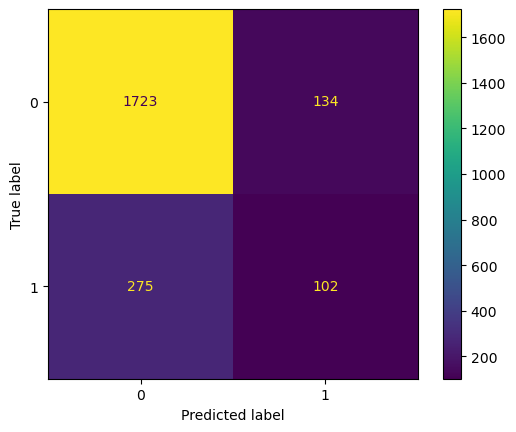

In [56]:
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

## Confusion Matrix for Decision Tree

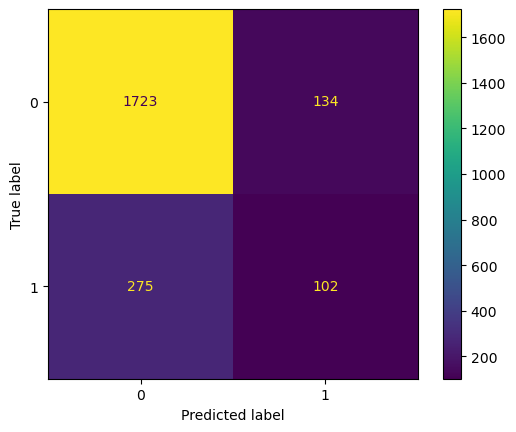

In [57]:
cm_DT = confusion_matrix(y_test,y_pred_val_tree1,labels=clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [58]:
final_data = pd.DataFrame({'Models': ['LR', 'DT'],
                          'ACC': [accuracy_score(y_test, y_pred),
                                 accuracy_score(y_test, y_pred_val_tree1)
                                 ]})

In [59]:
final_data

,Models,ACC
0,LR,0.816920
1,DT,0.725604


<Axes: xlabel='Models', ylabel='ACC'>

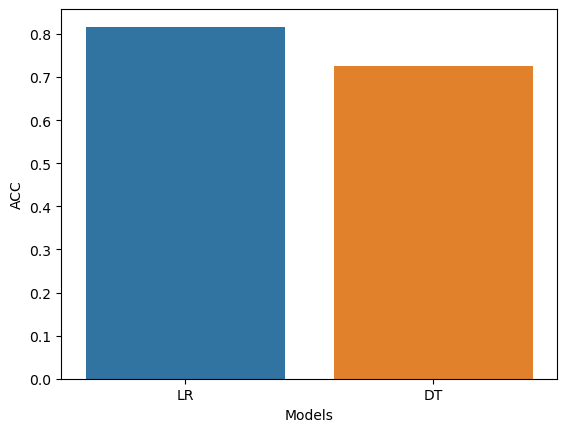

In [60]:
sns.barplot(x='Models', y='ACC', data=final_data)